In [1]:
from flasc import time_operations as top
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta as td
import numpy as np
from floris.utilities import wrap_360

from flasc import utilities as fsut
from itertools import product

# Grab the demo data set

In [2]:
df = pd.read_feather('../examples/demo_dataset/demo_dataset_scada_60s.ftr')
df.head()

,wd_truth,ws_truth,ti_truth,time,pow_000,pow_001,pow_002,pow_003,pow_004,pow_005,...,ti_004,ti_005,ti_006,is_operation_normal_000,is_operation_normal_001,is_operation_normal_002,is_operation_normal_003,is_operation_normal_004,is_operation_normal_005,is_operation_normal_006
0,93.1,2.183,0.050,2019-01-01 00:00:00+00:00,5000.0,5000.0,1354.163135,0.000000,1050.989865,3150.0,...,0.049324,0.059035,0.059012,True,True,True,False,True,True,True
1,92.4,2.240,0.043,2019-01-01 00:01:00+00:00,5000.0,5000.0,2650.400374,35.833456,1870.946499,3150.0,...,0.066116,0.050819,0.065489,True,True,True,True,True,True,True
2,94.1,1.811,0.094,2019-01-01 00:02:00+00:00,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.093177,0.101274,0.094774,True,True,True,True,True,True,True
3,94.3,1.949,0.046,2019-01-01 00:03:00+00:00,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.048890,0.053188,0.038684,True,True,True,True,True,True,True
4,97.8,1.773,0.058,2019-01-01 00:04:00+00:00,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.056722,0.058390,0.042689,True,True,True,True,True,True,True


In [3]:
# Limit to certain columns
cols_to_keep = [c for c in df.columns if (('time' in c) or ('pow' in c) or (('wd' in c) and (not 'truth' in c)))]
cols_to_keep

['time',
 'pow_000',
 'pow_001',
 'pow_002',
 'pow_003',
 'pow_004',
 'pow_005',
 'pow_006',
 'wd_000',
 'wd_001',
 'wd_002',
 'wd_003',
 'wd_004',
 'wd_005',
 'wd_006']

In [4]:
df = df[cols_to_keep]
df.head()

,time,pow_000,pow_001,pow_002,pow_003,pow_004,pow_005,pow_006,wd_000,wd_001,wd_002,wd_003,wd_004,wd_005,wd_006
0,2019-01-01 00:00:00+00:00,5000.0,5000.0,1354.163135,0.000000,1050.989865,3150.0,5000.0,94.699026,74.281547,126.409861,80.603581,124.459564,99.129121,72.699828
1,2019-01-01 00:01:00+00:00,5000.0,5000.0,2650.400374,35.833456,1870.946499,3150.0,5000.0,97.522582,72.732568,122.305300,80.548754,125.766381,100.169509,69.389084
2,2019-01-01 00:02:00+00:00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,98.999542,73.646254,127.803312,81.928199,124.214350,102.026750,73.288091
3,2019-01-01 00:03:00+00:00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,100.200212,77.335083,126.347390,87.843026,117.590720,99.166892,71.385690
4,2019-01-01 00:04:00+00:00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,107.825469,78.467461,131.139288,84.747361,130.001758,110.259141,78.133277


In [5]:
# Limit to two days
df = df.iloc[:60*24*2]

In [6]:
df.shape

(2880, 15)

In [7]:
cols_angular = [c for c in df.columns if 'wd' in c]
cols_angular

['wd_000', 'wd_001', 'wd_002', 'wd_003', 'wd_004', 'wd_005', 'wd_006']

In [8]:
# Show current method
df_base = top.df_downsample(df,cols_angular,td(seconds=600))
df_base.head()

,pow_000,pow_001,pow_002,pow_003,pow_004,pow_005,pow_006,wd_000,wd_001,wd_002,wd_003,wd_004,wd_005,wd_006
time,,,,,,,,,,,,,,
2019-01-01 00:10:00+00:00,1000.000000,1000.000000,400.456351,3.583346,292.193636,630.000000,1000.000000,102.574725,80.277402,131.831953,87.228904,128.143353,106.059002,76.640742
2019-01-01 00:20:00+00:00,0.000000,0.000000,0.000000,-0.325200,0.000000,0.000000,0.000000,108.655406,85.829613,139.802987,95.002847,136.295534,113.126298,83.219230
2019-01-01 00:30:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.410111,89.788504,144.198676,97.998787,138.723582,118.365701,86.506066
2019-01-01 00:40:00+00:00,717.728152,197.690561,540.342984,185.891866,223.889445,173.978007,731.845093,125.366969,103.196428,155.637470,109.991729,152.686617,128.115085,99.281772
2019-01-01 00:50:00+00:00,3941.843238,802.767915,2520.000000,2540.551737,2208.910009,325.112956,3951.727215,129.313369,107.245819,159.598822,113.359693,155.799858,135.071339,102.708238


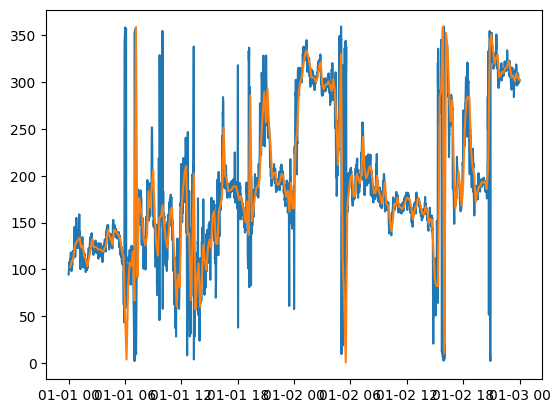

In [9]:
plt.plot(df.time,df.wd_000)
plt.plot(df_base.wd_000)

## Define an alternative

In [10]:
def df_downsample(
    df_in,
    cols_angular,
    window_width=td(seconds=60),
    min_periods=1,
    center=False,
    calc_median_min_max_std=False
):

    # Copy and ensure dataframe is indexed by time
    df = df_in.copy()
    
    if "time" not in df.columns:
        raise('ERROR TIME MUST BE COLUMNS')
        
    df = df.set_index('time')

    # Find non-angular columns
    cols_regular = [c for c in df.columns if c not in cols_angular]

    # Create named sin and cos columns for each angular signal
    sin_cols = ["{:s}_sin".format(c) for c in cols_angular]
    cos_cols = ["{:s}_cos".format(c) for c in cols_angular]

    # Add in the sin/cos columns
    df = pd.concat([df, np.sin(df[cols_angular] * np.pi / 180.0).set_axis(sin_cols, axis=1)], axis=1)
    df = pd.concat([df, np.cos(df[cols_angular] * np.pi / 180.0).set_axis(cos_cols, axis=1)], axis=1)

    # Drop angular columns
    df = df.drop(columns=cols_angular)

    # Add _N for each variable to keep track of n.o. data points
    cols_all = df.columns
    cols_N = ["{:s}_N".format(c) for c in cols_all]
    df = pd.concat([df, 1 - df[cols_all].isna().astype(int).set_axis(cols_N, axis=1)], axis=1)

    # Now calculate downsampled dataframe, automatically
    # mark by label on the right (i.e., "past 10 minutes").
    df_resample = df.resample(window_width, label="right", axis=0)

    # First calculate mean values of non-angular columns
    df_mean = df_resample[cols_regular].mean().copy()

    # Compute and append the angular means
    df_mean =pd.concat([df_mean, pd.DataFrame(wrap_360(np.arctan2(
                                            df_resample[sin_cols].mean().values,
                                            df_resample[cos_cols].mean().values) * 180.0 / np.pi),
                                             columns=cols_angular,
                                             index = df_mean.index)
                       ], axis=1)

    # Check if we have enough samples for every measurement
    if min_periods > 1:
        N_counts = df_resample[cols_N].sum()
        df_mean[N_counts < min_periods] = None  # Remove data relying on too few samples



    # Calculate median, min, max, std if necessary
    if calc_median_min_max_std:
        
        df_stats = df_in.copy().set_index('time')
        
        # Compute the stats for the non_angular columns
        df_stats_regular =  (df_stats
            [cols_regular] # Select non-angular columns
            .resample(window_width, label="right", axis=0) # Resample to desired window
            .agg(["median", "min", "max", "std"]) # Perform aggregations
            .pipe(lambda df_: top.flatten_cols(df_)) # Flatten columns
            
        )

        
        # Now to compute the statistics for the angular columns
        # Which reguires shifting by the mean values
        df_angular_mean_upsample = (df_mean
                   [cols_angular]
                   .reindex(df_stats.index) # Go back to original time index
                   .bfill() # Back fill the points since using right indexing
                   .ffill() # Cover any stragglers at end
        )
        
        df_angular_stats = (df_stats
                    [cols_angular]
                   .subtract(df_angular_mean_upsample) # Subtract the angular mean
                   .add(180) # Shift up by 180 (start of sequence for -180/180 wrap)
                   .mod(360) # Now wrap by 360
                   .subtract(180)
                   .resample(window_width, label="right", axis=0) # Resample to desired window
               )
        
        # Now create the individual statistics
        df_angular_median = (df_angular_stats
                     .median() # Apply the median
                     .add(df_mean[cols_angular]) # Shift back by original mean
                     .mod(360) # Wrap by 360
                     .rename({c:'%s_median' % c for c in cols_angular},axis='columns')
                    )
        
        df_angular_min = (df_angular_stats
             .min() # Apply the min
             .add(df_mean[cols_angular]) # Shift back by original mean
             .mod(360) # Wrap by 360
             .rename({c:'%s_min' % c for c in cols_angular},axis='columns')
            )
        
        df_angular_max = (df_angular_stats
             .max() # Apply the max
             .add(df_mean[cols_angular]) # Shift back by original mean
             .mod(360) # Wrap by 360
             .rename({c:'%s_max' % c for c in cols_angular},axis='columns')
            )
        
        df_angular_std = (df_angular_stats
             .std() # Apply the median
             .rename({c:'%s_std' % c for c in cols_angular},axis='columns')
            )
        
        
        # df_out is the concatination of all these matrices
        df_out = pd.concat([df_mean.rename({c:'%s_mean' % c for c in df_mean.columns},axis='columns'),
                            df_stats_regular,
                            df_angular_median,
                            df_angular_min,
                            df_angular_max,
                            df_angular_std
                            ], axis=1)
        
        df_out = df_out[sorted(df_out.columns)]
        
    else: # if not computing stats
        df_out = df_mean
        
    if center:
        # Shift time column towards center of the bin
        df_out.index = df_out.index - window_width / 2.0


    return df_out.reset_index() # Conform to new standard that between functions time is a column


# df_downsample(df,cols_angular,td(seconds=600), calc_median_min_max_std=True)


In [11]:
# This version handles standard deviations more consistently.
# min, max, median are left as in the version above.

def df_downsample_alt(
    df_in,
    cols_angular,
    window_width=td(seconds=60),
    min_periods=1,
    center=False,
    calc_median_min_max_std=False
):

    # Copy and ensure dataframe is indexed by time
    df = df_in.copy()
    
    if "time" not in df.columns:
        raise('ERROR TIME MUST BE COLUMNS')
        
    df = df.set_index('time')

    # Find non-angular columns
    cols_regular = [c for c in df.columns if c not in cols_angular]

    # Create named sin and cos columns for each angular signal
    sin_cols = ["{:s}_sin".format(c) for c in cols_angular]
    cos_cols = ["{:s}_cos".format(c) for c in cols_angular]

    # Add in the sin/cos columns
    df = pd.concat([df, np.sin(df[cols_angular] * np.pi / 180.0).set_axis(sin_cols, axis=1)], axis=1)
    df = pd.concat([df, np.cos(df[cols_angular] * np.pi / 180.0).set_axis(cos_cols, axis=1)], axis=1)

    # Drop angular columns
    df = df.drop(columns=cols_angular)

    # Add _N for each variable to keep track of n.o. data points
    cols_all = df.columns
    cols_N = ["{:s}_N".format(c) for c in cols_all]
    df = pd.concat([df, 1 - df[cols_all].isna().astype(int).set_axis(cols_N, axis=1)], axis=1)

    # Now calculate downsampled dataframe, automatically
    # mark by label on the right (i.e., "past 10 minutes").
    df_resample = df.resample(window_width, label="right", axis=0)

    # First calculate mean values of non-angular columns
    df_mean = df_resample[cols_regular].mean().copy()

    # Compute and append the angular means
    df_mean =pd.concat([df_mean, pd.DataFrame(wrap_360(np.arctan2(
                                            df_resample[sin_cols].mean().values,
                                            df_resample[cos_cols].mean().values) * 180.0 / np.pi),
                                             columns=cols_angular,
                                             index = df_mean.index)
                       ], axis=1)

    # Check if we have enough samples for every measurement
    if min_periods > 1:
        N_counts = df_resample[cols_N].sum()
        df_mean[N_counts < min_periods] = None  # Remove data relying on too few samples

    # Calculate median, min, max, std if necessary
    if calc_median_min_max_std:
        
        df_stats = df_in.copy().set_index('time')
        
        # Compute the stats for the non_angular columns
        df_stats_regular =  (df_stats
            [cols_regular] # Select non-angular columns
            .resample(window_width, label="right", axis=0) # Resample to desired window
            .agg(["median", "min", "max", "std"]) # Perform aggregations
            .pipe(lambda df_: top.flatten_cols(df_)) # Flatten columns
            
        )

        
        # Now to compute the statistics for the angular columns
        # Which reguires shifting by the mean values
        df_angular_mean_upsample = (df_mean
                   [cols_angular]
                   .reindex(df_stats.index) # Go back to original time index
                   .bfill() # Back fill the points since using right indexing
                   .ffill() # Cover any stragglers at end
        )
        
        df_angular_stats = (df_stats
                    [cols_angular]
                   .subtract(df_angular_mean_upsample) # Subtract the angular mean
                   .add(180) # Shift up by 180 (start of sequence for -180/180 wrap)
                   .mod(360) # Now wrap by 360
                   .subtract(180)
                   .resample(window_width, label="right", axis=0) # Resample to desired window
               )
        
        # Now create the individual statistics
        df_angular_median = (df_angular_stats
                     .median() # Apply the median
                     .add(df_mean[cols_angular]) # Shift back by original mean
                     .mod(360) # Wrap by 360
                     .rename({c:'%s_median' % c for c in cols_angular},axis='columns')
                    )
        
        df_angular_min = (df_angular_stats
             .min() # Apply the min
             .add(df_mean[cols_angular]) # Shift back by original mean
             .mod(360) # Wrap by 360
             .rename({c:'%s_min' % c for c in cols_angular},axis='columns')
            )
        
        df_angular_max = (df_angular_stats
             .max() # Apply the max
             .add(df_mean[cols_angular]) # Shift back by original mean
             .mod(360) # Wrap by 360
             .rename({c:'%s_max' % c for c in cols_angular},axis='columns')
            )
        
        df_angular_std = (df_angular_stats
             .std() # Apply the median
             .rename({c:'%s_std' % c for c in cols_angular},axis='columns')
            )

        df_angular_std = (df_resample[sin_cols].mean()
             .rename({"{:s}_sin".format(c):"{:s}_std".format(c)
                      for c in cols_angular},axis='columns')
             .pow(2)
             .add(df_resample[cos_cols].mean()
                  .rename({"{:s}_cos".format(c):"{:s}_std".format(c)
                           for c in cols_angular},axis='columns')
                  .pow(2)
             )
             .pow(1/2) # sqrt()
             .apply(np.log) # log()
             .mul(-2)
             .pow(1/2) # sqrt()
             .mul(180/np.pi)
        )

        #import ipdb; ipdb.set_trace()
        
        
        # df_out is the concatination of all these matrices
        df_out = pd.concat([df_mean.rename({c:'%s_mean' % c for c in df_mean.columns},axis='columns'),
                            df_stats_regular,
                            df_angular_median,
                            df_angular_min,
                            df_angular_max,
                            df_angular_std
                            ], axis=1)
        
        df_out = df_out[sorted(df_out.columns)]
        
    else: # if not computing stats
        df_out = df_mean
        
        
    if center:
        # Shift time column towards center of the bin
        df_out.index = df_out.index - window_width / 2.0


    return df_out.reset_index() # Conform to new standard that between functions time is a column

## mean only

In [12]:
# Show current method
df_base = top.df_downsample(df,cols_angular,td(seconds=600))
df_base.head()

,pow_000,pow_001,pow_002,pow_003,pow_004,pow_005,pow_006,wd_000,wd_001,wd_002,wd_003,wd_004,wd_005,wd_006
time,,,,,,,,,,,,,,
2019-01-01 00:10:00+00:00,1000.000000,1000.000000,400.456351,3.583346,292.193636,630.000000,1000.000000,102.574725,80.277402,131.831953,87.228904,128.143353,106.059002,76.640742
2019-01-01 00:20:00+00:00,0.000000,0.000000,0.000000,-0.325200,0.000000,0.000000,0.000000,108.655406,85.829613,139.802987,95.002847,136.295534,113.126298,83.219230
2019-01-01 00:30:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.410111,89.788504,144.198676,97.998787,138.723582,118.365701,86.506066
2019-01-01 00:40:00+00:00,717.728152,197.690561,540.342984,185.891866,223.889445,173.978007,731.845093,125.366969,103.196428,155.637470,109.991729,152.686617,128.115085,99.281772
2019-01-01 00:50:00+00:00,3941.843238,802.767915,2520.000000,2540.551737,2208.910009,325.112956,3951.727215,129.313369,107.245819,159.598822,113.359693,155.799858,135.071339,102.708238


In [13]:
df_new = df_downsample(df,cols_angular,td(seconds=600))
df_new.head()

,time,pow_000,pow_001,pow_002,pow_003,pow_004,pow_005,pow_006,wd_000,wd_001,wd_002,wd_003,wd_004,wd_005,wd_006
0,2019-01-01 00:10:00+00:00,1000.000000,1000.000000,400.456351,3.583346,292.193636,630.000000,1000.000000,102.574725,80.277402,131.831953,87.228904,128.143353,106.059002,76.640742
1,2019-01-01 00:20:00+00:00,0.000000,0.000000,0.000000,-0.325200,0.000000,0.000000,0.000000,108.655406,85.829613,139.802987,95.002847,136.295534,113.126298,83.219230
2,2019-01-01 00:30:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.410111,89.788504,144.198676,97.998787,138.723582,118.365701,86.506066
3,2019-01-01 00:40:00+00:00,717.728152,197.690561,540.342984,185.891866,223.889445,173.978007,731.845093,125.366969,103.196428,155.637470,109.991729,152.686617,128.115085,99.281772
4,2019-01-01 00:50:00+00:00,3941.843238,802.767915,2520.000000,2540.551737,2208.910009,325.112956,3951.727215,129.313369,107.245819,159.598822,113.359693,155.799858,135.071339,102.708238


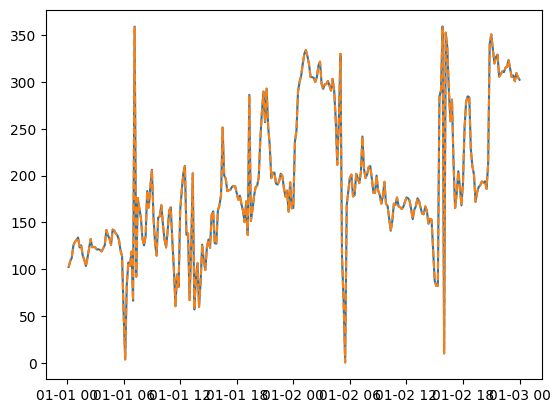

In [14]:
plt.plot(df_base.wd_000)
plt.plot(df_new.time, df_new.wd_000,'--')

## All stats

In [15]:
df_base = top.df_downsample(df,cols_angular,td(seconds=600), calc_median_min_max_std=True)
df_base.head()

,pow_000_mean,pow_001_mean,pow_002_mean,pow_003_mean,pow_004_mean,pow_005_mean,pow_006_mean,wd_000_mean,wd_001_mean,wd_002_mean,...,wd_004_max,wd_005_max,wd_006_max,wd_000_std,wd_001_std,wd_002_std,wd_003_std,wd_004_std,wd_005_std,wd_006_std
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:10:00+00:00,1000.000000,1000.000000,400.456351,3.583346,292.193636,630.000000,1000.000000,102.574725,80.277402,131.831953,...,134.085864,111.928533,84.777069,4.554843,5.613403,5.762655,4.583519,4.862569,5.248245,4.793001
2019-01-01 00:20:00+00:00,0.000000,0.000000,0.000000,-0.325200,0.000000,0.000000,0.000000,108.655406,85.829613,139.802987,...,146.439115,122.265974,88.913134,5.321100,4.108717,4.284409,2.550620,3.951607,4.390142,3.583702
2019-01-01 00:30:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.410111,89.788504,144.198676,...,142.891753,129.004444,93.213420,4.790945,2.481243,4.274503,3.210671,3.274405,5.249966,3.269988
2019-01-01 00:40:00+00:00,717.728152,197.690561,540.342984,185.891866,223.889445,173.978007,731.845093,125.366969,103.196428,155.637470,...,171.722116,146.944488,117.825892,10.883943,13.574499,13.078834,13.184744,13.028228,11.390611,11.440034
2019-01-01 00:50:00+00:00,3941.843238,802.767915,2520.000000,2540.551737,2208.910009,325.112956,3951.727215,129.313369,107.245819,159.598822,...,177.963186,155.102492,123.883430,12.675086,10.460485,10.941069,10.454071,11.095955,11.542221,11.055068


In [16]:
df_new = df_downsample(df,cols_angular,td(seconds=600), calc_median_min_max_std=True)
print(df_new.head())

df_new2 = df_downsample_alt(df,cols_angular,td(seconds=600), calc_median_min_max_std=True)
print(df_new2.head())

                       time  pow_000_max  pow_000_mean  pow_000_median  \
0 2019-01-01 00:10:00+00:00       5000.0   1000.000000             0.0   
1 2019-01-01 00:20:00+00:00          0.0      0.000000             0.0   
2 2019-01-01 00:30:00+00:00          0.0      0.000000             0.0   
3 2019-01-01 00:40:00+00:00       5000.0    717.728152             0.0   
4 2019-01-01 00:50:00+00:00       5000.0   3941.843238          5000.0   

   pow_000_min  pow_000_std  pow_001_max  pow_001_mean  pow_001_median  \
0          0.0  2108.185107  5000.000000   1000.000000             0.0   
1          0.0     0.000000     0.000000      0.000000             0.0   
2          0.0     0.000000     0.000000      0.000000             0.0   
3          0.0  1652.917213  1976.905607    197.690561             0.0   
4          0.0  2085.432637  3227.508718    802.767915             0.0   

   pow_001_min  ...  wd_005_max  wd_005_mean  wd_005_median  wd_005_min  \
0          0.0  ...  111.928533   1

### Show equivalence 

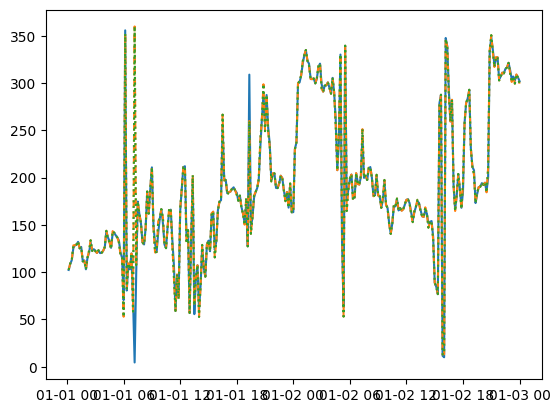

In [17]:
plt.plot(df_base.wd_000_median)
plt.plot(df_new.time, df_new.wd_000_median,'--')
plt.plot(df_new2.time, df_new2.wd_000_median,':')

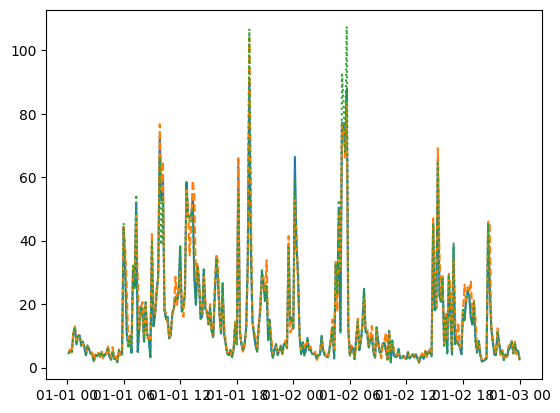

In [18]:
plt.plot(df_base.wd_000_std)
plt.plot(df_new.time, df_new.wd_000_std,'--')
plt.plot(df_new2.time, df_new2.wd_000_std,':')

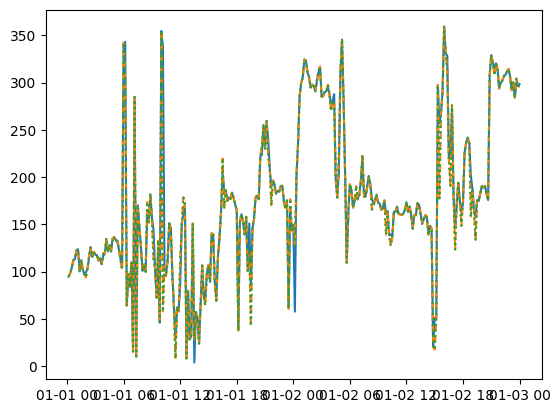

In [19]:
plt.plot(df_base.wd_000_min)
plt.plot(df_new.time, df_new.wd_000_min,'--')
plt.plot(df_new2.time, df_new2.wd_000_min,':')

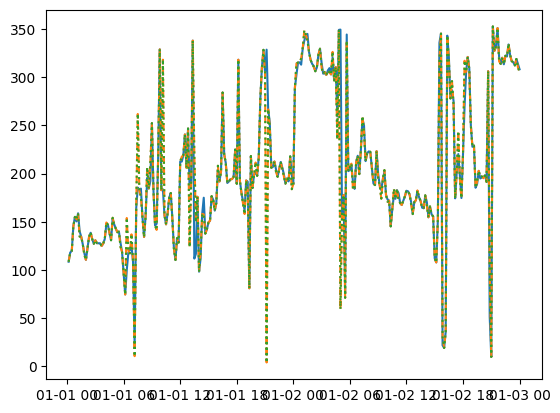

In [20]:
plt.plot(df_base.wd_000_max)
plt.plot(df_new.time, df_new.wd_000_max,'--')
plt.plot(df_new2.time, df_new2.wd_000_max,':')

## Go back to full size frame to check times

In [21]:
df = pd.read_feather('../examples/demo_dataset/demo_dataset_scada_60s.ftr')

In [22]:
%%timeit
df_base = top.df_downsample(df,cols_angular,td(seconds=600), calc_median_min_max_std=True)

/opt/anaconda3/envs/flasc-reqs/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/msinner/flasc/flasc/time_operations.py:275: RuntimeWarning: All-NaN slice encountered
  values_min = wrap_360(np.nanmin(values, axis=1))
/Users/msinner/flasc/flasc/time_operations.py:276: RuntimeWarning: All-NaN slice encountered
  values_max = wrap_360(np.nanmax(values, axis=1))
/opt/anaconda3/envs/flasc-reqs/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/flasc-reqs/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/msinner/flasc/flasc/time_operations.py:275: RuntimeWarning: All-NaN slice encountered
  

5.63 s ± 94.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/opt/anaconda3/envs/flasc-reqs/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [23]:
%%timeit
df_new = df_downsample(df,cols_angular,td(seconds=600), calc_median_min_max_std=True)

2.1 s ± 31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%%timeit
df_new2 = df_downsample_alt(df,cols_angular,td(seconds=600), calc_median_min_max_std=True)

2.2 s ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


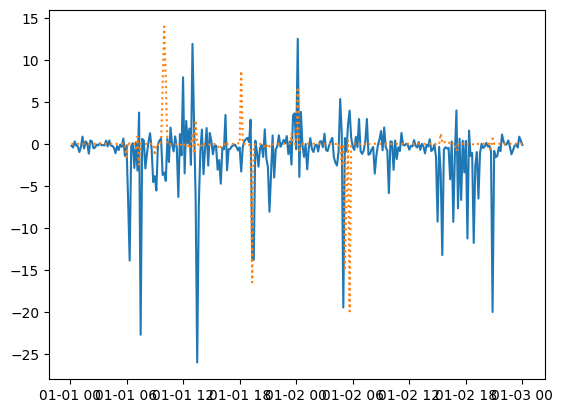

In [25]:
# Alt implementation has lower errors overall
plt.plot(df_new.time, df_base.wd_000_std.values - df_new.wd_000_std.values)
plt.plot(df_new2.time, df_base.wd_000_std.values - df_new2.wd_000_std.values, ':')
